# The Ocean's Deep-Diving Animals

[Project extensions are at the bottom of this file]

How deep can air-breathing animals dive into the ocean? Do whales go deeper than seals? Which animals go the deepest?

In this project, we'll harness the powerful of data visualization to compare the diving depths of the ocean's deepest divers. Along the way, we'll transform Matplotlib's default bar charts into compelling visuals that tell a story.

### Loading the Data

The main file for this project is `deepest-diving-animals.csv`. This contains the deepest diving depths ever recorded in the scientific literature for different species of marine animals (measured in meters).

Load the data into python and take a look.

Activity Goals:
- Load the data.
- Display the dataframe.

In [2]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'deepest-diving-animals.csv'.

# from google.colab import files
# uploaded = files.upload()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
divers = pd.read_csv('deepest-diving-animals.csv')
divers #display the dataframe

,animal,category,depth
0,Emperor Penguin,penguins,564
1,King Penguin,penguins,343
2,Rockhopper Penguin,penguins,104
3,Macaroni Penguin,penguins,154
4,Royal Penguin,penguins,226
...,...,...,...
113,Northern Sea Otter,sea otters,97
114,Southern Sea Otter,sea otters,88
115,Atlantic Walrus,walruses,500
116,Dugong,other marine mammals,33


This dataset contains the deepest recorded depths for 118 animals across a variety of categories.

How many categories are there?

Let's perform a quick `value_counts()` to list how many animals are in each category.

Activity Goal:
- Count the number of animals in each category.

In [4]:
divers['category'].value_counts()

category
other seabirds          45
seals                   24
penguins                14
toothed whales          14
baleen whales            7
sea lions                5
turtles                  4
sea otters               2
other marine mammals     2
walruses                 1
Name: count, dtype: int64

This shows that there are 10 different categories, including 14 species of penguins and 7 species of baleen whales.

Let's find the deepest depth that animals can dive for each of these 10 categories.

### Max Depth per Category
We can find the maximum depth for each category using a `groupby()`.

Activity Goals:
- Group the rows by category.
- Choose the 'depth' column.
- Find the maximum.
- Display the results.

In [5]:
max_depths = divers.groupby('category')['depth'].max()
max_depths #display the result

category
baleen whales            616
other marine mammals      33
other seabirds           152
penguins                 564
sea lions                597
sea otters                97
seals                   2389
toothed whales          2992
turtles                 1344
walruses                 500
Name: depth, dtype: int64

Here max_depths is a series object. The values are indexed by category.

Let's use `reset_index( )` to turn this into a 2-column dataframe.

Activity Goals:
- Turn the series into a dataframe.
- Name the values column 'max_depth'.
- Display it.

In [6]:
df = max_depths.reset_index(name='max_depth')
df #display the results

,category,max_depth
0,baleen whales,616
1,other marine mammals,33
2,other seabirds,152
3,penguins,564
4,sea lions,597
5,sea otters,97
6,seals,2389
7,toothed whales,2992
8,turtles,1344
9,walruses,500


From this dataframe we see that there are penguins that can dive down to 564 meters! This is much deeper than other seabirds which have a maximum recorded depth of 152 meters.

### The Default Bar Chart

Let's visualize these maximum diving depths using a bar chart. We'll start with Matplotlib's default settings.

Activity Goals:
- Plot a bar chart of the max depth per category.
- Label the y axis.

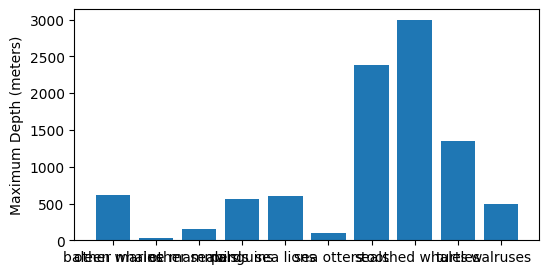

In [7]:
plt.figure(figsize=(6, 3))
plt.bar(df['category'], df['max_depth'])
plt.ylabel('Maximum Depth (meters)')
plt.show()

The main issue is the overlapping x-axis labels. 

### Pro Tip 1: Use Horizontal Bars

The first issue to overcome is the overlapping text. There are multiple ways to deal with this, such as rotating, shortening or modifying the layout of the labels.

Over the years, horizontal bar charts have gained popularity because they allow text labels to stay horizontal, which improves readability.

Let's see how it looks by using the `barh()` method.

Activity Goals:
- Create a horizontal bar chart.
- Label the x axis.

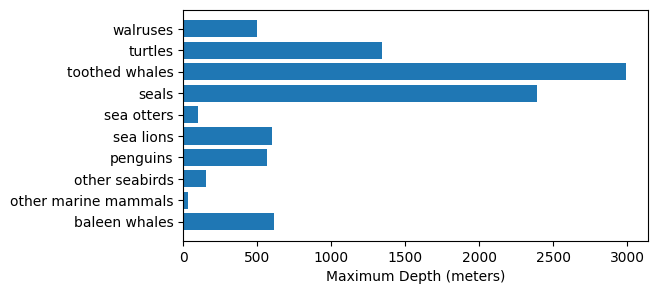

In [8]:
plt.figure(figsize=(6, 3))
plt.barh(df['category'], df['max_depth'])
plt.xlabel('Maximum Depth (meters)')
plt.show()


While this is a big improvement, we can improve the readability of the graph even more.

### Pro Tip 2: Give the Bars Order
Currently the bars aren't in any logical order.

When there is no natural ordering, we recommend numerically sorting the bars. This will give the bars a visual order and make it easier to compare bars of similar magnitude.

Activity Goals:
- Sort max_depth values.
- Display the result.

In [9]:
df = df.sort_values('max_depth')
df #display it

,category,max_depth
1,other marine mammals,33
5,sea otters,97
2,other seabirds,152
9,walruses,500
3,penguins,564
4,sea lions,597
0,baleen whales,616
8,turtles,1344
6,seals,2389
7,toothed whales,2992


Now we can redraw the `barh()` and we'll get sorted bars. Run the code below.

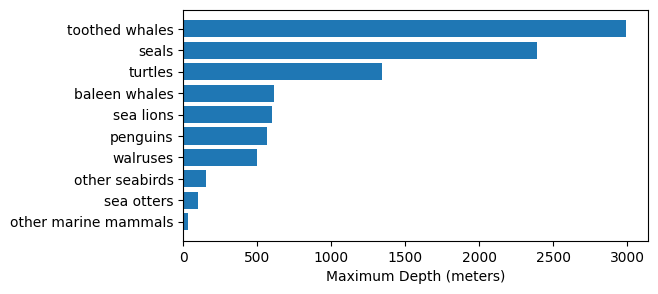

In [10]:
plt.figure(figsize=(6, 3))
plt.barh(df['category'], df['max_depth'])
plt.xlabel('Maximum Depth (meters)')
plt.show()

Sorting by depth makes it easier to compare the diving depths of different animal categories.

### Pro Tip 3: Swap ticks and spines for faded grid lines

The default chart is trapped in bounding lines called spines.

Let's hide the spines to produce a cleaner graph:

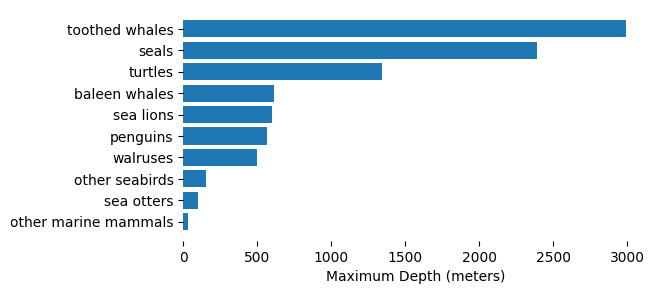

In [11]:
plt.figure(figsize=(6, 3))
plt.barh(df['category'], df['max_depth'])
plt.xlabel('Maximum Depth (meters)')

# Pro Tip 3
ax = plt.gca()
ax.spines[['top','bottom','left','right']].set_visible(False)

plt.show()  

Next let's replace the ticks with vertical grid lines.

We can fade the grid lines by reducing the alpha level to 50%:

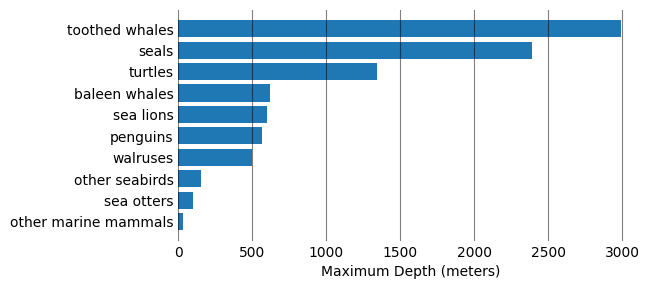

In [12]:
plt.figure(figsize=(6, 3))
plt.barh(df['category'], df['max_depth'])
plt.xlabel('Maximum Depth (meters)')

# Pro Tip 3
ax = plt.gca() # get current axis
ax.spines[['top','bottom','left','right']].set_visible(False)
ax.grid(axis='x', color='black', alpha=0.5)
ax.tick_params(axis='both', length=0)
plt.show()

There we go! We swapped out the "ticks and spines" for "faded grid lines".

This produces a less cluttered presentation of the data. The vertical grid makes it easier to estimate the value of the horizontal bars.

Here is a python function we can use to apply Pro Tip 3 to any bar chart:

In [13]:
def clean_bar_axes( ):
	ax = plt.gca() # get current axis
	ax.spines[['top','bottom','left','right']].set_visible(False)
	ax.grid(axis='x', color='black', alpha=0.5)
	ax.tick_params(axis='both', length=0)

### Pro Tip Recap
Let's summarize the three tips for compelling bar charts:

- Pro Tip 1: Use horizontal bar charts.
- Pro Tip 2: Give the bars order.
- Pro Tip 3: Swap ticks and spines for faded grid lines.

These three Pro Tips improve the readability of our graph. Next we will use focus to tell a story.

### Visual Storytelling
Much of this project has improved the readability of our bar chart. However, it's important to keep in mind that the goal of data visualization is to convey a data story, not just make a clear graph.

Let's take a look at our graph of maximum diving depth by category and see how we might elevate the data storytelling.

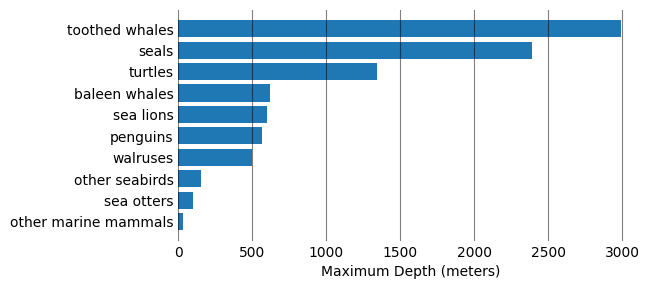

In [14]:
plt.figure(figsize=(6, 3))
plt.barh(df['category'], df['max_depth'])
plt.xlabel('Maximum Depth (meters)')
clean_bar_axes()

How extreme is 2000 meters under the ocean?

We can enhance the storytelling of this graph by helping the reader build intuition about these depth values. In this case, maybe we can give a sense of the intense pressures these deep-diving animals experience.

There is a well-documented case of a nuclear submarine that imploded when it descended to the crushing depths of 730 meters.

Let's add this submarine implosion depth as a reference bar to our graph, and use a different color to distinguish it from the other data.

### Adding a Reference Row
A flexible way to control the colors in a graph is to first add a color column to the dataframe. Let's do that:

Activity Goals:
- Add a color column to df.
- Display the result.

In [15]:
df['color'] = 'C0'
df #display it

,category,max_depth,color
1,other marine mammals,33,C0
5,sea otters,97,C0
2,other seabirds,152,C0
9,walruses,500,C0
3,penguins,564,C0
4,sea lions,597,C0
0,baleen whales,616,C0
8,turtles,1344,C0
6,seals,2389,C0
7,toothed whales,2992,C0


This created a new `color` column with values of `C0`.

`C0` is the first color in the tab10 color palette supported by Matplotlib.

Now let's add a reference row for the "submarine implosion" depth of 730 meters. We'll use a color of `C1`.

We can locate rows by index using the `df.loc[index]` notation. This also allows us to add new rows. Try it out:

In [16]:
df.loc['ref_0'] = ['submarine implosion', 730, 'C1']
df = df.sort_values('max_depth')
df #display it"

,category,max_depth,color
1,other marine mammals,33,C0
5,sea otters,97,C0
2,other seabirds,152,C0
9,walruses,500,C0
3,penguins,564,C0
4,sea lions,597,C0
0,baleen whales,616,C0
ref_0,submarine implosion,730,C1
8,turtles,1344,C0
6,seals,2389,C0


This shows that there are only 3 categories that go deeper than our reference depth.

### Plotting with Color

Now let's update our horizontal bar chart using the new color column.

Activity Goals:
- Draw barh with the color argument.
- Label the x axis.
- Apply Pro Tip 3 using `clean_bar_axes()`.

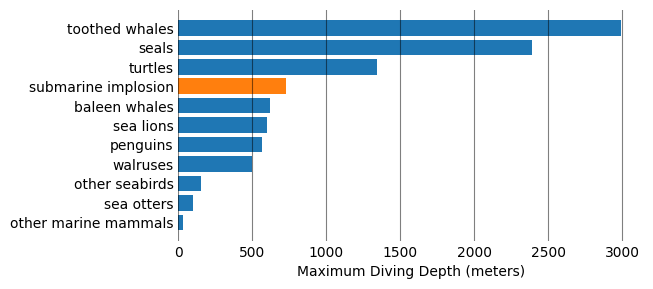

In [ ]:
plt.figure(figsize=(6, 3))
plt.barh(df['category'], df['max_depth'], color=df['color'])
plt.xlabel('Maximum Diving Depth (meters)')
clean_bar_axes()


This is a compelling bar chart that tells a story. It follows all three Pro Tips and also provides a reference bar to help the reader interpret the data.

The minimal use of color differentiates the reference bar and helps guide the reader's focus.

## Project extensions

Here are some project extension ideas:

1. Create a horizontal bar chart to compare the diving depths of animals within a specific group, such as penguins. 

2. Explore deep-sea divers of the midnight zone (depths exceeding 1,000 meters). Incorporate color encoding to indicate which of these species use echolocation.

Add meaningful reference bars into your new story. Ideas include the Titanic's resting depth, deepest human free diver, deepest SCUBA diver, deepest underwater rescue, and the height of the world's tallest building.


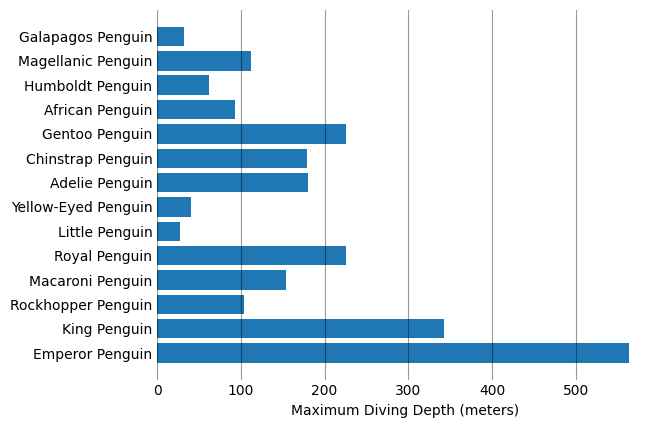

In [26]:
# Create a horizontal bar chart to compare the diving depths of animals within a specific group, such as penguins. 

df_penguins = divers[divers['category'] == 'penguins']
df_penguins.head(10)

def clean_bar_axes2():
    ax = plt.gca()
    ax.spines[['left','right','bottom','top']].set_visible(False)
    ax.grid(axis='x', color = 'black',alpha=0.4)
    ax.tick_params(axis = 'both', length = 0)

plt.barh(df_penguins['animal'],df_penguins['depth'])
plt.xlabel('Maximum Diving Depth (meters)')
clean_bar_axes2()

In [28]:
df_penguins['color'] = 'C0'
df_penguins

df_penguins.loc["Titanic's resting depth"] = ['titanic','ship',3800,'C1']
df_penguins.loc["Herbert Nitsch"] = ['Deeper human free diver','human',253,'C2']
df_penguins.loc["Ahmed Gabr"] = ['Deepest Scuba diver','human',332,'C3']
df_penguins.loc["Roger Mallinson & Roger Chapman"] = ['Deeper underwater rescue','human',480,'C4']
df_penguins.loc["Burj Khalifa"] = ["World's tallest building",'building',828,'C5']

df_penguins.sort_values(by='depth',inplace=True)
df_penguins

/tmp/ipykernel_70912/4098730818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penguins['color'] = 'C0'
/tmp/ipykernel_70912/4098730818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penguins.loc["Titanic's resting depth"] = ['titanic','ship',3800,'C1']
/tmp/ipykernel_70912/4098730818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penguins.loc["Herbert Nit

,animal,category,depth,color
5,Little Penguin,penguins,27,C0
13,Galapagos Penguin,penguins,32,C0
6,Yellow-Eyed Penguin,penguins,41,C0
11,Humboldt Penguin,penguins,62,C0
10,African Penguin,penguins,93,C0
2,Rockhopper Penguin,penguins,104,C0
12,Magellanic Penguin,penguins,112,C0
3,Macaroni Penguin,penguins,154,C0
8,Chinstrap Penguin,penguins,179,C0
7,Adelie Penguin,penguins,180,C0


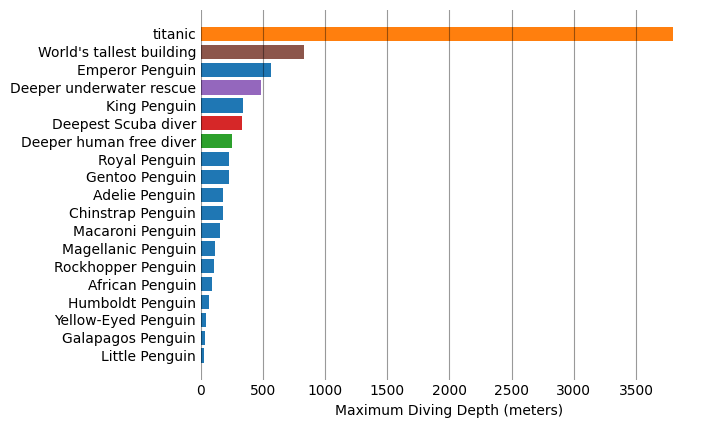

In [30]:
plt.barh(df_penguins['animal'],df_penguins['depth'],color=df_penguins['color'])
plt.xlabel('Maximum Diving Depth (meters)')
clean_bar_axes2()

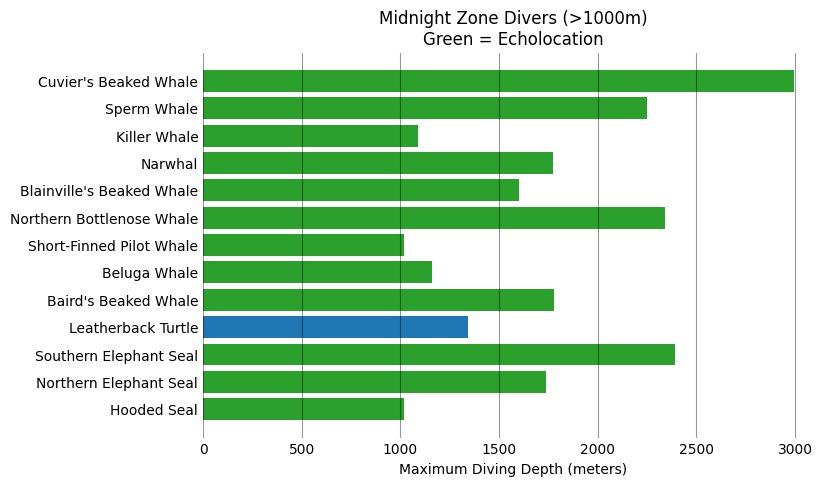

In [31]:
# Explore deep-sea divers of the midnight zone (depths exceeding 1,000 meters).
# Incorporate color encoding to indicate which of these species use echolocation.

midnight_zone = divers[divers['depth'] > 1000].copy()
midnight_zone['echolocation'] = midnight_zone['category'].isin(['toothed whales', 'seals'])
midnight_zone['color'] = midnight_zone['echolocation'].map({True: 'C2', False: 'C0'})

plt.figure(figsize=(8, 5))
plt.barh(midnight_zone['animal'], midnight_zone['depth'], color=midnight_zone['color'])
plt.xlabel('Maximum Diving Depth (meters)')
plt.title('Midnight Zone Divers (>1000m)\nGreen = Echolocation')
clean_bar_axes2()
